LOGİSTİK REGRESYON İLE TAHMİNLEME       

P=e^(a+bX)/(1+e^(a+bX))

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [45]:
# 1) Veri ve hedefi sınıfa çevir
df = pd.read_csv("data_cleaned.csv")
df['price_class'] = pd.qcut(df['price'], q=2, labels=[0,1]).astype(int)

In [46]:
X = df.drop(columns=['price','price_class'])
y = df['price_class']


In [47]:
cat = ['location','city','district','neighborhood']
num = ['room','living_room','area','age','floor']

In [48]:
prep = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
])

In [49]:
pipe = Pipeline([
    ('prep', prep),
    ('clf', LogisticRegression(max_iter=1000)),
])


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.23, random_state=6, stratify=y
)


In [51]:
pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
print("Fitted?", hasattr(pipe.named_steps['clf'], "classes_"))  
print("Test Accuracy:", pipe.score(X_test, y_test))



Fitted? True
Test Accuracy: 0.7391304347826086


In [53]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez-istiklal-satilik',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'istiklal',
    'room': 3, 'living_room': 1, 'area': 120, 'age': 5, 'floor': 3
}])

pred  = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]
print("Tahmin (0=ucuz,1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)



Tahmin (0=ucuz,1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.12722243 0.87277757]


In [54]:
hasattr(pipe, "classes_") 

True

In [55]:
# Tek bir evin özellikleri
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'esentepe',
    'room': 2,
    'living_room': 1,
    'area': 100,   
    'age': 10,      
    'floor': 3
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)





Tahmin (0=ucuz, 1=pahalı): 0
Olasılıklar [ucuz, pahalı]: [0.59678837 0.40321163]


In [56]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'nazmi_saatçi',
    'room': 3,
    'living_room': 1,
    'area': 115,   
    'age': 22,      
    'floor': 2
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)



Tahmin (0=ucuz, 1=pahalı): 0
Olasılıklar [ucuz, pahalı]: [0.78986436 0.21013564]


In [57]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'erkmen',
    'neighborhood': '',
    'room': 4,
    'living_room': 1,
    'area': 165,   
    'age': 0,      
    'floor': 3
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.02818659 0.97181341]


In [58]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'kanlıca',
    'room': 2,
    'living_room': 1,
    'area': 95,   
    'age': 1,      
    'floor': 1
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.48947183 0.51052817]


In [63]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'erenler',
    'room': 2,
    'living_room': 0,
    'area': 50,   
    'age': 8,      
    'floor': 4
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 0
Olasılıklar [ucuz, pahalı]: [0.9537206 0.0462794]


In [59]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez_harbiş'],
    'neighborhood': ['zafer'],
    'room': [2],
    'living_room': [1],
    'area': [100],
    'age': [8],
    'floor': [4]
})
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.48947183 0.51052817]


In [60]:
new_data = pd.DataFrame({
    'city': ['afyonkarahisar'],
    'district': ['merkez'],
    'neighborhood': ['erenler'],
    'room': [2],
    'living_room': [0],
    'area': [50],
    'age': [8],
    'floor': [4]
})
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.48947183 0.51052817]


In [64]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'uydukent',
    'room': 4,
    'living_room': 1,
    'area': 170,   
    'age': 0,      
    'floor': 3
}])

# Tahmin
pred = pipe.predict(new_house)[0]
proba = pipe.predict_proba(new_house)[0]

print("Tahmin (0=ucuz, 1=pahalı):", pred)
print("Olasılıklar [ucuz, pahalı]:", proba)

Tahmin (0=ucuz, 1=pahalı): 1
Olasılıklar [ucuz, pahalı]: [0.01270898 0.98729102]


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Sequence
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

sns.set(style="whitegrid")


def plot_cls_metrics_bar(y_true: Sequence[int], y_pred: Sequence[int], y_score: Sequence[float]):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    try:
        auc = roc_auc_score(y_true, y_score)
    except Exception:
        auc = np.nan

    metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
    values = [acc, prec, rec, f1, auc]

    plt.figure(figsize=(7, 4))
    ax = sns.barplot(x=metrics, y=values, palette=["#6baed6", "#9ecae1", "#74c476", "#31a354", "#fd8d3c"])
    for i, v in enumerate(values):
        label = "NA" if np.isnan(v) else f"{v:.3f}"
        ax.text(i, 0.01 if np.isnan(v) else v, label, ha="center", va="bottom", fontsize=9)
        
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("Skor")
    ax.set_title("Sınıflandırma Ölçütleri")
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix_heatmap(y_true: Sequence[int], y_pred: Sequence[int]):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4.5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Ucuz (0)", "Pahalı (1)"], yticklabels=["Ucuz (0)", "Pahalı (1)"])
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.title("Karmaşıklık Matrisi")
    plt.tight_layout()
    plt.show()


def plot_roc_pr_curves(y_true: Sequence[int], y_score: Sequence[float]):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    RocCurveDisplay.from_predictions(y_true, y_score, ax=axes[0])
    axes[0].set_title("ROC Eğrisi")
    PrecisionRecallDisplay.from_predictions(y_true, y_score, ax=axes[1])
    axes[1].set_title("Precision-Recall Eğrisi")
    plt.tight_layout()
    plt.show()


C:\Users\sema_\AppData\Local\Temp\ipykernel_14432\2162278995.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette=["#6baed6", "#9ecae1", "#74c476", "#31a354", "#fd8d3c"])


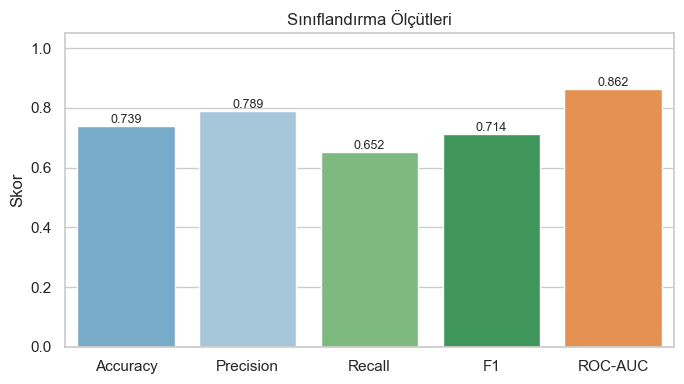

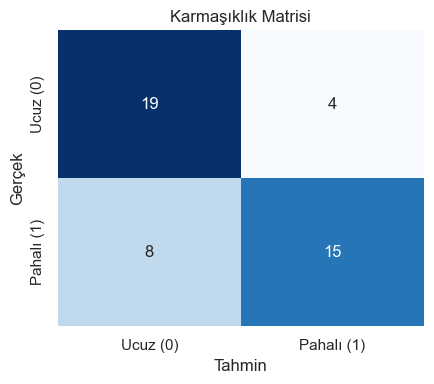

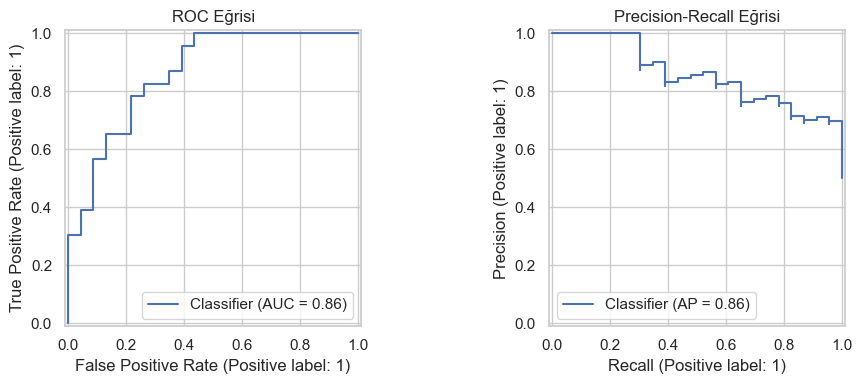

In [62]:
# Test seti üzerinde tahmin ve görselleştirme
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

plot_cls_metrics_bar(y_test, y_pred, y_proba)
plot_confusion_matrix_heatmap(y_test, y_pred)
plot_roc_pr_curves(y_test, y_proba)
